In [1]:
import torch
import os

print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())
print(os.getcwd())

0
1
GeForce GTX 1060
True
D:\Anupam_Technical\Code\ML\DS_ML_Projects\DeepLearning


In [8]:
%matplotlib inline
from fastai.vision.all import *
from nbdev.showdoc import *
doc(untar_data)

#### Crawl the web to download bear images. We are interested in three categories of bears, grizzly, black and teddy. The images will be downloaded to dataset folder in the directory where this notebook is present.

In [6]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [22]:
import sys                                      
sys.path.append('D:\\Anupam_Technical\\Code\\ML\\fast_ai')
from ai_utilities import *                      
from pathlib import Path                         
from fastai.vision.all import *                                                                                                                      
#for p in ['grizzly bear', 'black bear', 'teddy bear']:               
#    image_download(p, 300)                                                                                

from nbdev.showdoc import *
doc(ImageDataLoaders.from_folder)

In [10]:
path = Path.cwd()/'dataset'
np.random.seed(42)
dls = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, item_tfms=RandomResizedCrop(460, min_scale=0.75),bs=64, 
                                   batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)], num_workers=0)

In [16]:
dls.vocab

['black bear', 'grizzly bear', 'teddy bear']

In [23]:
dls.vocab, dls.c, len(dls.train_ds), len(dls.valid_ds)

(['black bear', 'grizzly bear', 'teddy bear'], 3, 527, 131)

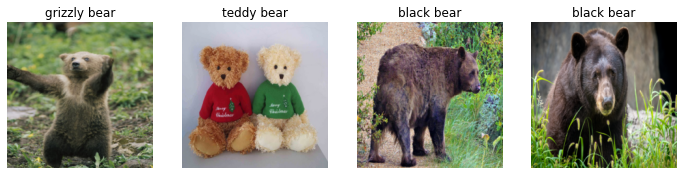

In [12]:
dls.valid.show_batch(max_n=4, nrows=1)

In [13]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.452384,0.199416,0.091603,00:30
1,0.759259,0.087582,0.045802,00:29
2,0.488621,0.077339,0.030534,00:29
3,0.366854,0.079200,0.038168,00:28


In [17]:
learn.save('stage-1')

Path('D:/Anupam_Technical/Code/ML/DS_ML_Projects/DeepLearning/dataset/models/stage-1.pth')

In [18]:
learn.unfreeze()

SuggestedLRs(lr_min=6.918309954926372e-05, lr_steep=6.309573450380412e-07)

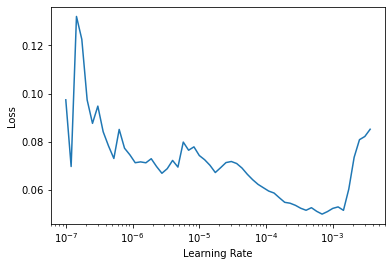

In [19]:
learn.lr_find()

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

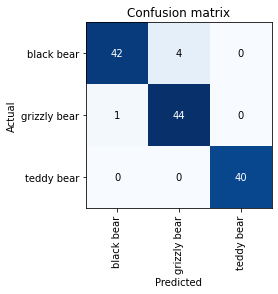

In [21]:
interp.plot_confusion_matrix()